### 3d20 dice roll success table

This code can be used to create an array that contains probabilities of success when rolling 3 20-sided die and comparing the results against 2 different values, a skill value and a difficulty class. It can be a useful reference for a tabletop game depending on its rules.

The skill value represents a character's aptitude for the check, from 1 to 20. 
The difficulty class represents the extent of the dice challenge, from 2 to 20.

The code isn't optimized at all, since it only needs to run once to give the results. It outputs a 2D array that contains probabilities of success for each possible instance of skill and difficulty.

In [5]:
import numpy as np

# Define the problem
die = 20
nof_dice = 3
outcomes = die ** nof_dice

# Define the dimensions of the sample space
sample_space = np.zeros(shape=(outcomes, nof_dice), dtype=int)


In [6]:
# Assign proper dice values to the sample space
# Currently 3 dice supported, uncommenting can enable 2 or 4 instead
for a in range(die):
    for b in range(die):
        # sample_space[die*a + b] = [a+1, b+1] 
        for c in range(die):
            sample_space[die**2*a + die*b + c] = [a+1, b+1, c+1]
            # for d in range(die):
                # sample_space[die**3*a + die**2*b + die*c + d] = [a+1, b+1, c+1, d+1]
        

In [7]:
# Checks the successfulness of a dice roll, given 
# a sample, the skill rank and the difficulty class.
def check_success(sample, skill, dc):
    
    ## Find the die roll(s) closest to the skill value
    distances = np.abs(np.subtract(np.copy(sample), skill))
    closest = np.where(distances == min(distances))
    
    ## Select the closest die or the largest in case of a tie
    if len(closest) == 1:
        result = sample[distances.argmin()]
    else:
        result = max(np.where(sample==closest))
        
    ## Check if the resultant dice value meets or exceeds the required difficulty
    return 1 if result >= dc else 0

In [8]:
# Calculates the probability of success, given 
# the sample space, skill level and roll difficulty class
def check_probability(sample_space, skill, dc):
    count = 0
    checks = len(sample_space)
    for x in range(checks):
        count += check_success(sample_space[x], skill, dc)
        
    return count / checks

In [9]:
# Initialize success table
success_table = np.zeros(shape=(die, die), dtype=float)

# Calculate probabilities given DC and skill values in full range of the die
for dc in range (die):
    for skill in range (die):
        success_table[dc, skill] = check_probability(sample_space, skill+1, dc+1)

In [10]:
# For cleaner output
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# Presto!
print(success_table)

[[1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000
  1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
 [0.8574 0.8784 0.9039 0.9264 0.9459 0.9624 0.9759 0.9864 0.9939 0.9984
  0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999 0.9999]
 [0.7290 0.7358 0.7823 0.8303 0.8722 0.9083 0.9383 0.9623 0.9802 0.9922
  0.9982 0.9990 0.9990 0.9990 0.9990 0.9990 0.9990 0.9990 0.9990 0.9990]
 [0.6141 0.6141 0.6396 0.7086 0.7761 0.8346 0.8841 0.9246 0.9561 0.9786
  0.9921 0.9966 0.9966 0.9966 0.9966 0.9966 0.9966 0.9966 0.9966 0.9966]
 [0.5120 0.5120 0.5180 0.5660 0.6545 0.7385 0.8105 0.8705 0.9185 0.9545
  0.9785 0.9905 0.9920 0.9920 0.9920 0.9920 0.9920 0.9920 0.9920 0.9920]
 [0.4219 0.4219 0.4219 0.4444 0.5119 0.6169 0.7144 0.7969 0.8644 0.9169
  0.9544 0.9769 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844 0.9844]
 [0.3430 0.3430 0.3430 0.3483 0.3902 0.4743 0.5927 0.7007 0.7907 0.8628
  0.9167 0.9527 0.9708 0.9730 0.9730 0.9730 0.9730 0.9730 

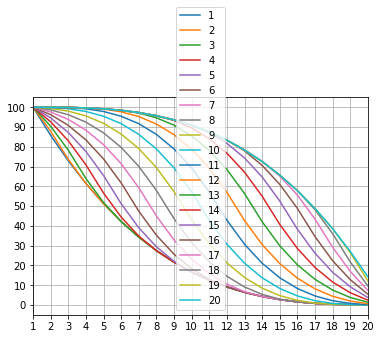

In [87]:
# Let's display this data in a more visual format
import pandas as pd

df = pd.DataFrame(success_table, 
                  index=range(1, die+1), 
                  columns=range(1, die+1))

percentages = df * 100

percentages.plot(xticks=range(1, die+1), 
                 yticks=range(0, 101, 10), 
                 xlim=(1, 20),
                 grid=True)